# 1. Dataset Exploration

## 1.1 Load the dataset and explore its structure

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [95]:
df = pd.read_csv('house_data.csv')

In [96]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [97]:
df.shape

(21613, 21)

## 1.2 Identify the target variable and potential features for linear regression

The target variable for linear regression is `price`, and potential features are the remaining columns.

# 2. Data Preprocessing

# 2.1 Handle missing values

In [98]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is `no null values in the dataset`

## 2.2 Explore and address outliers

In [99]:
# Function to detect and remove outliers
def detect_and_remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df

In [100]:
df.shape

(21613, 21)

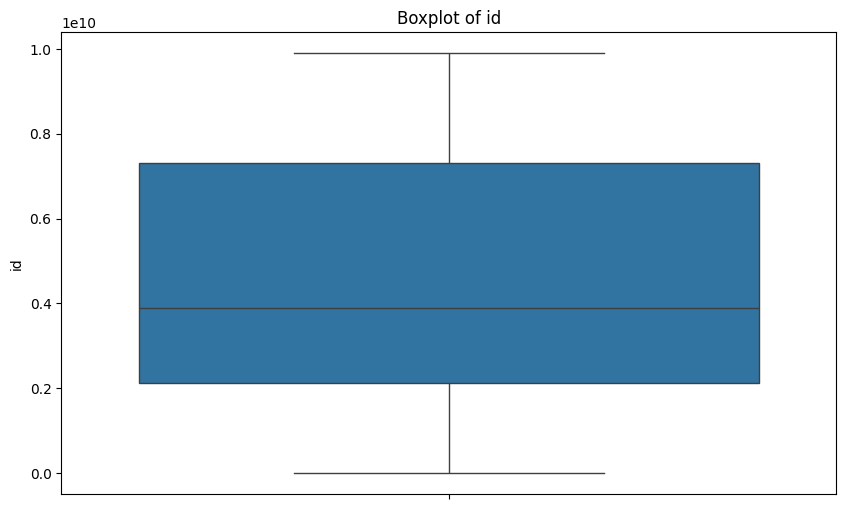

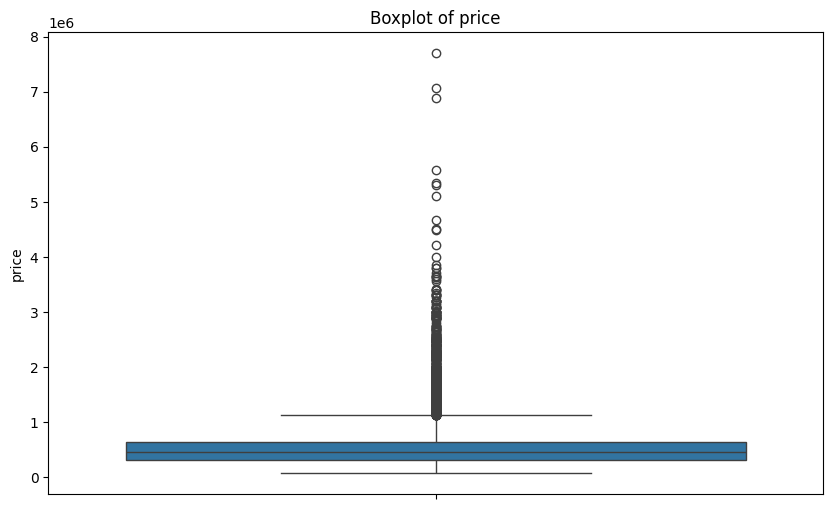

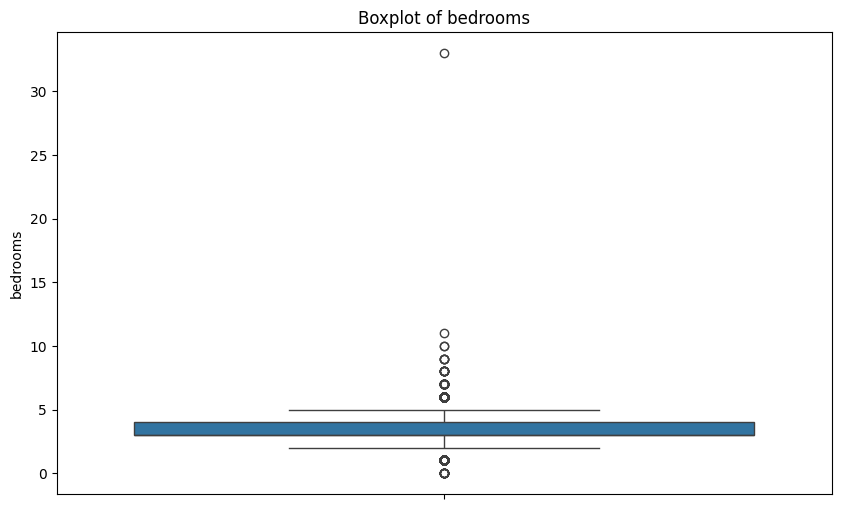

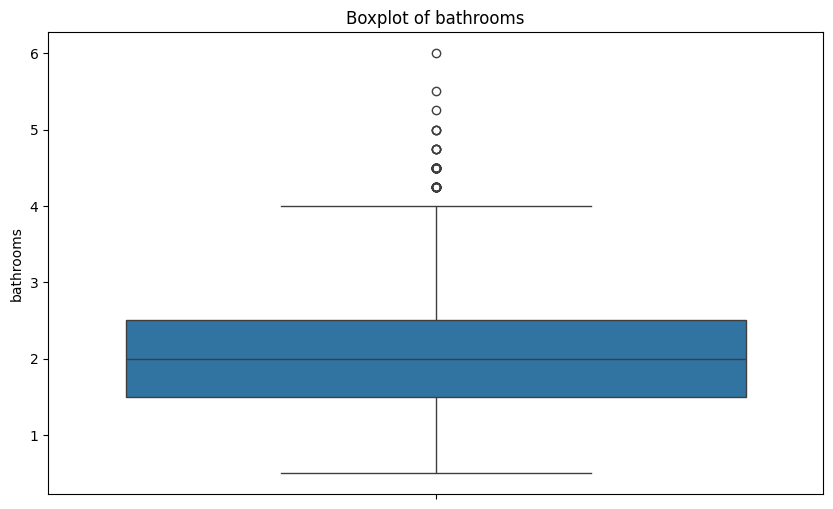

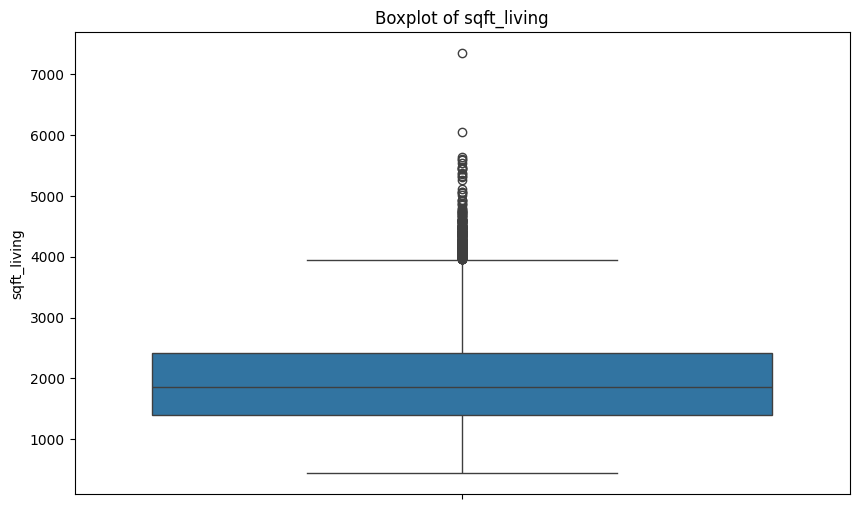

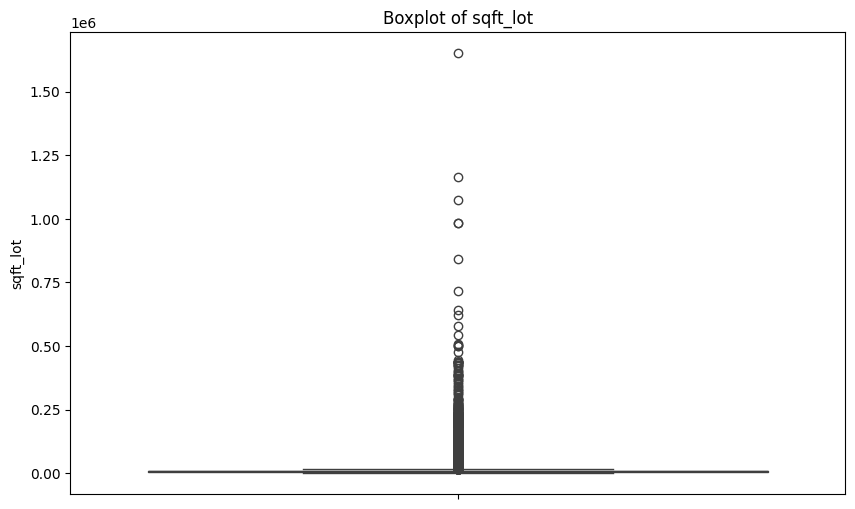

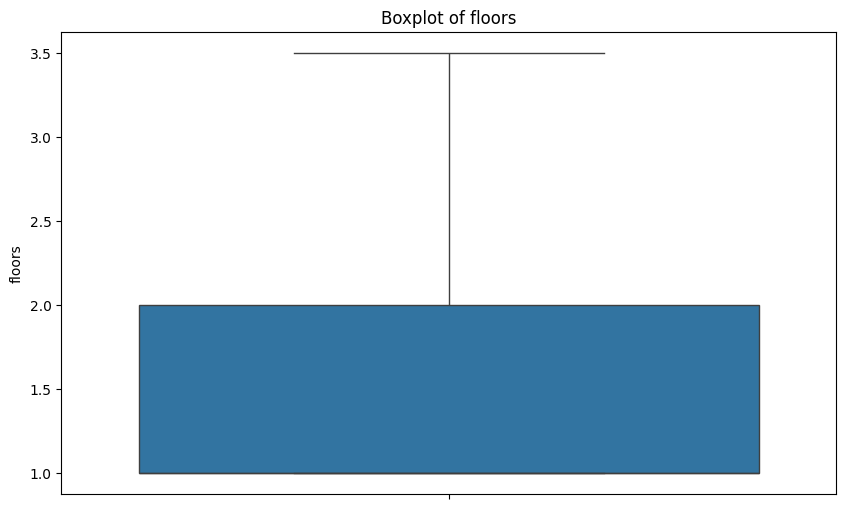

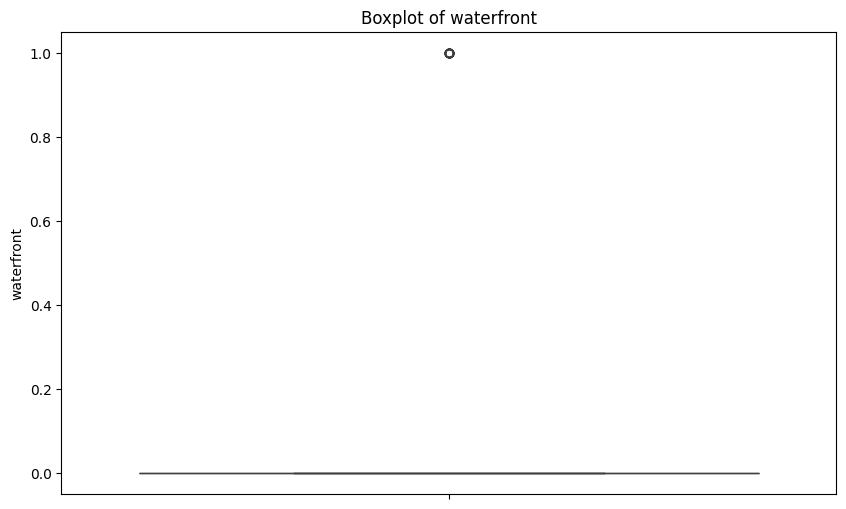

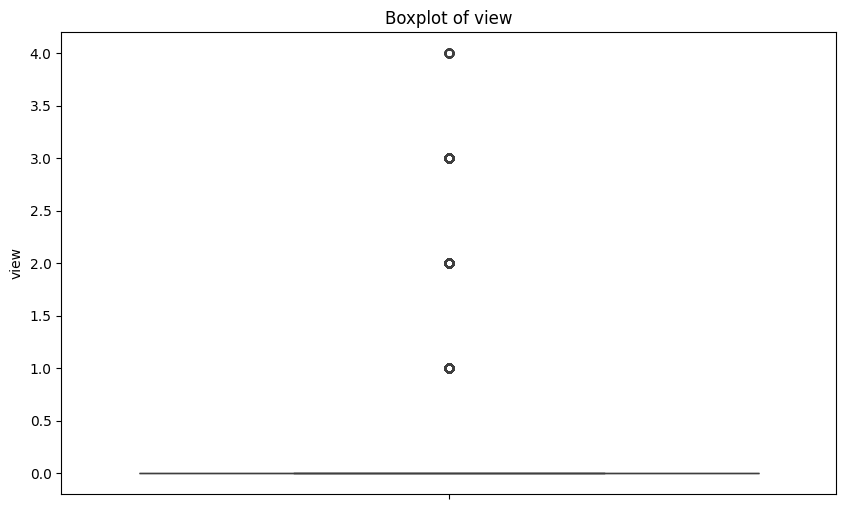

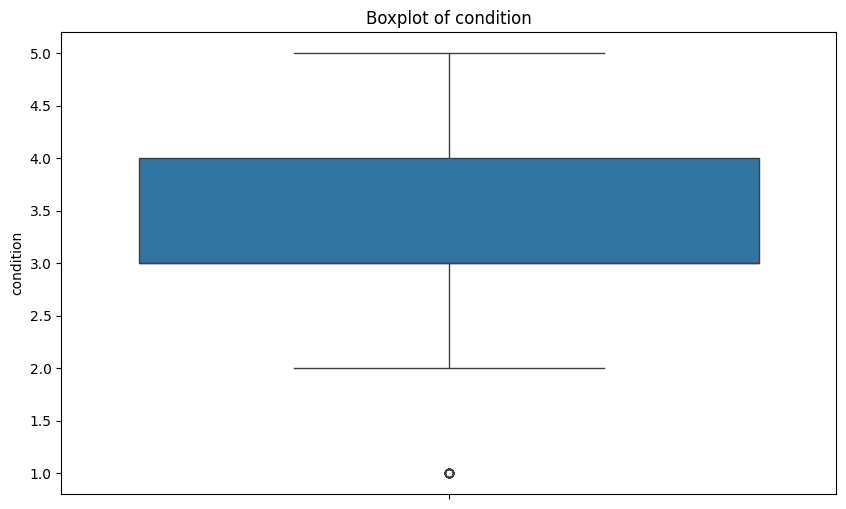

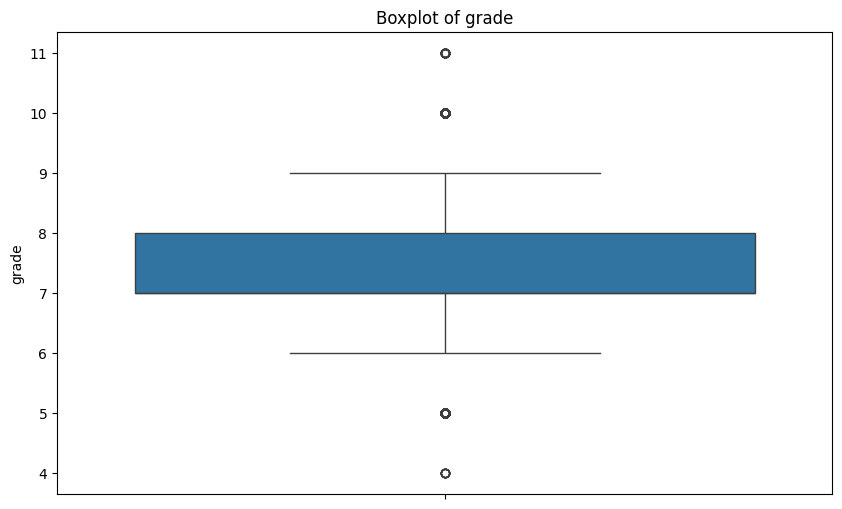

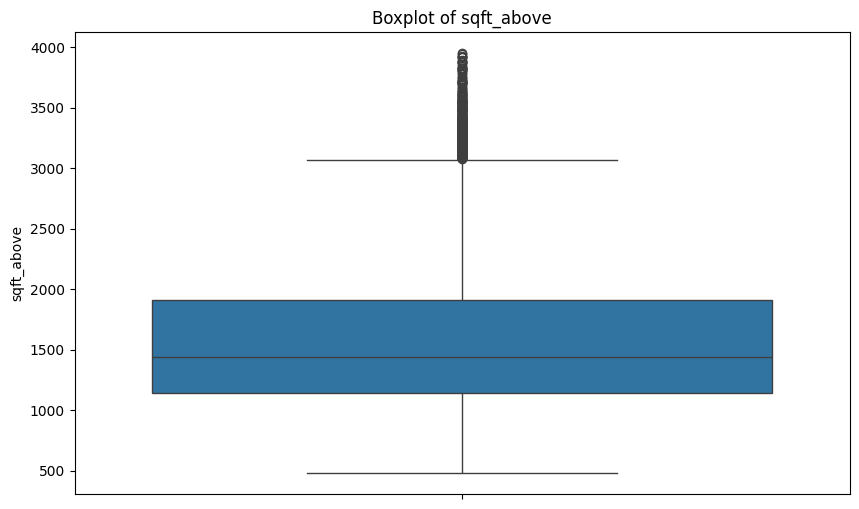

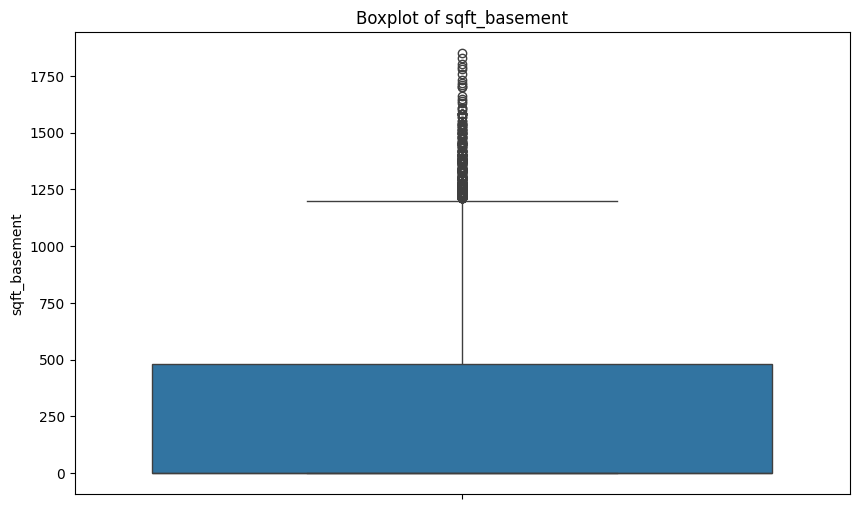

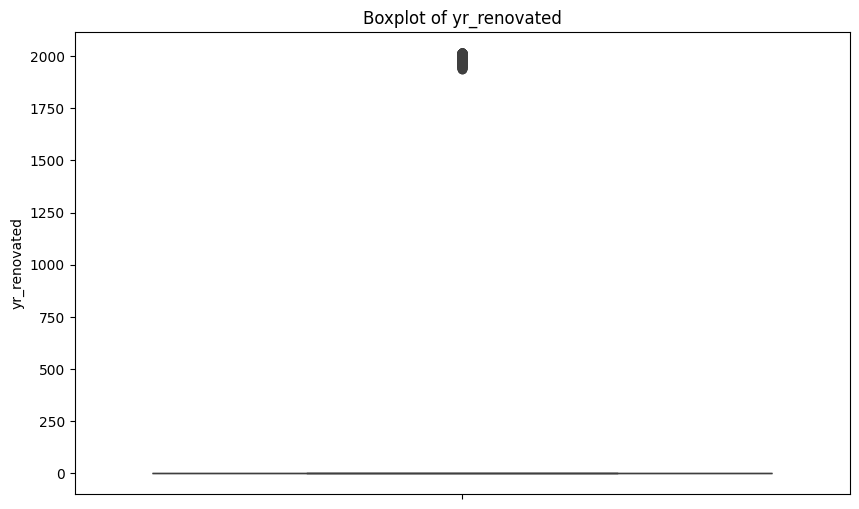

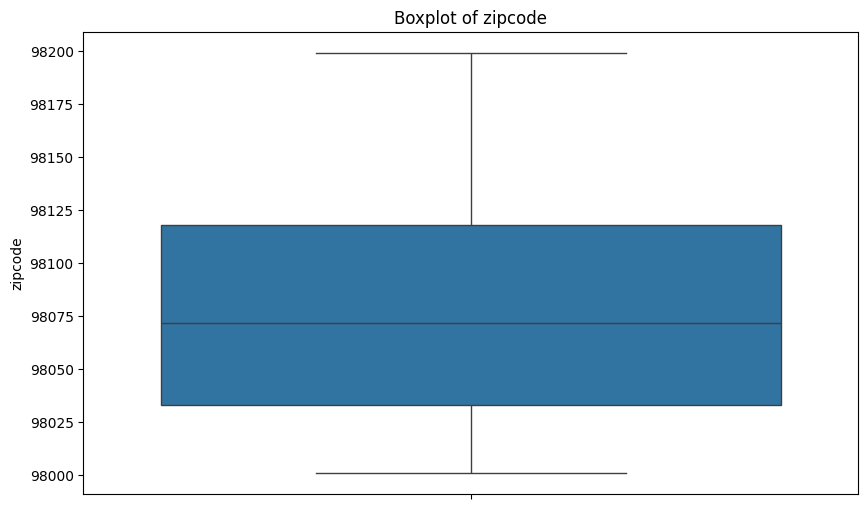

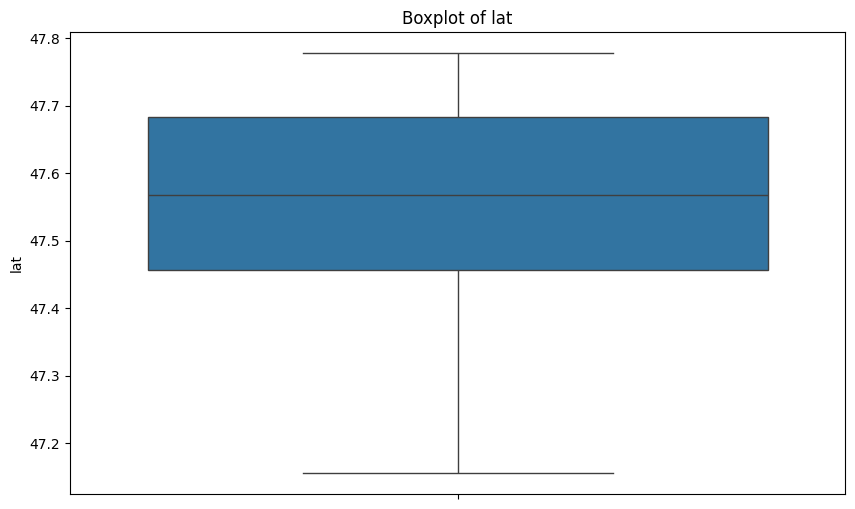

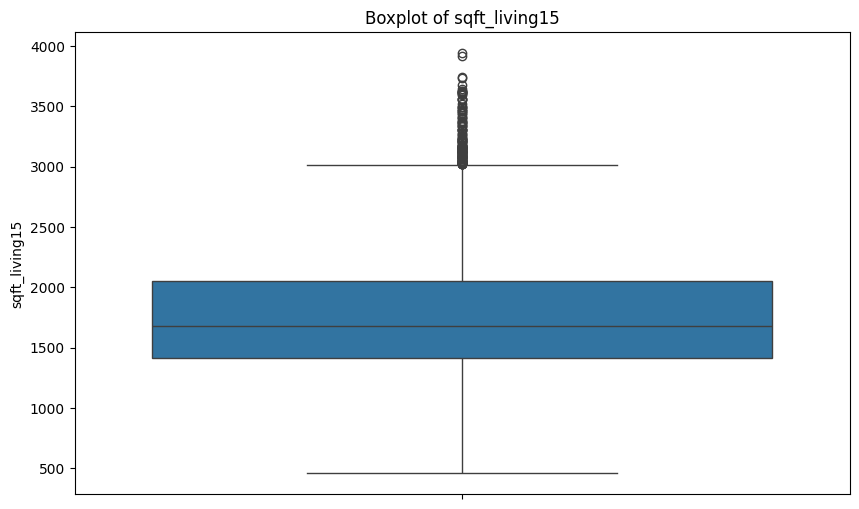

In [101]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for feature in numerical_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(df[feature])
  plt.title(f'Boxplot of {feature}')
  plt.show()

  df = detect_and_remove_outliers(df, feature)

In [102]:
df.shape

(13868, 21)

## 2.3 Handle Categorical Features

In [103]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [104]:
df.drop(columns=['id', 'date', 'zipcode'], axis=1, inplace=True)

`There is no categorical features`

# 3. Exploratory Data Analysis (EDA)

## 3.1 Visualize the distribution of the `target` variable

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## 3.2 The relationships between `features` and the `target` through pair plots

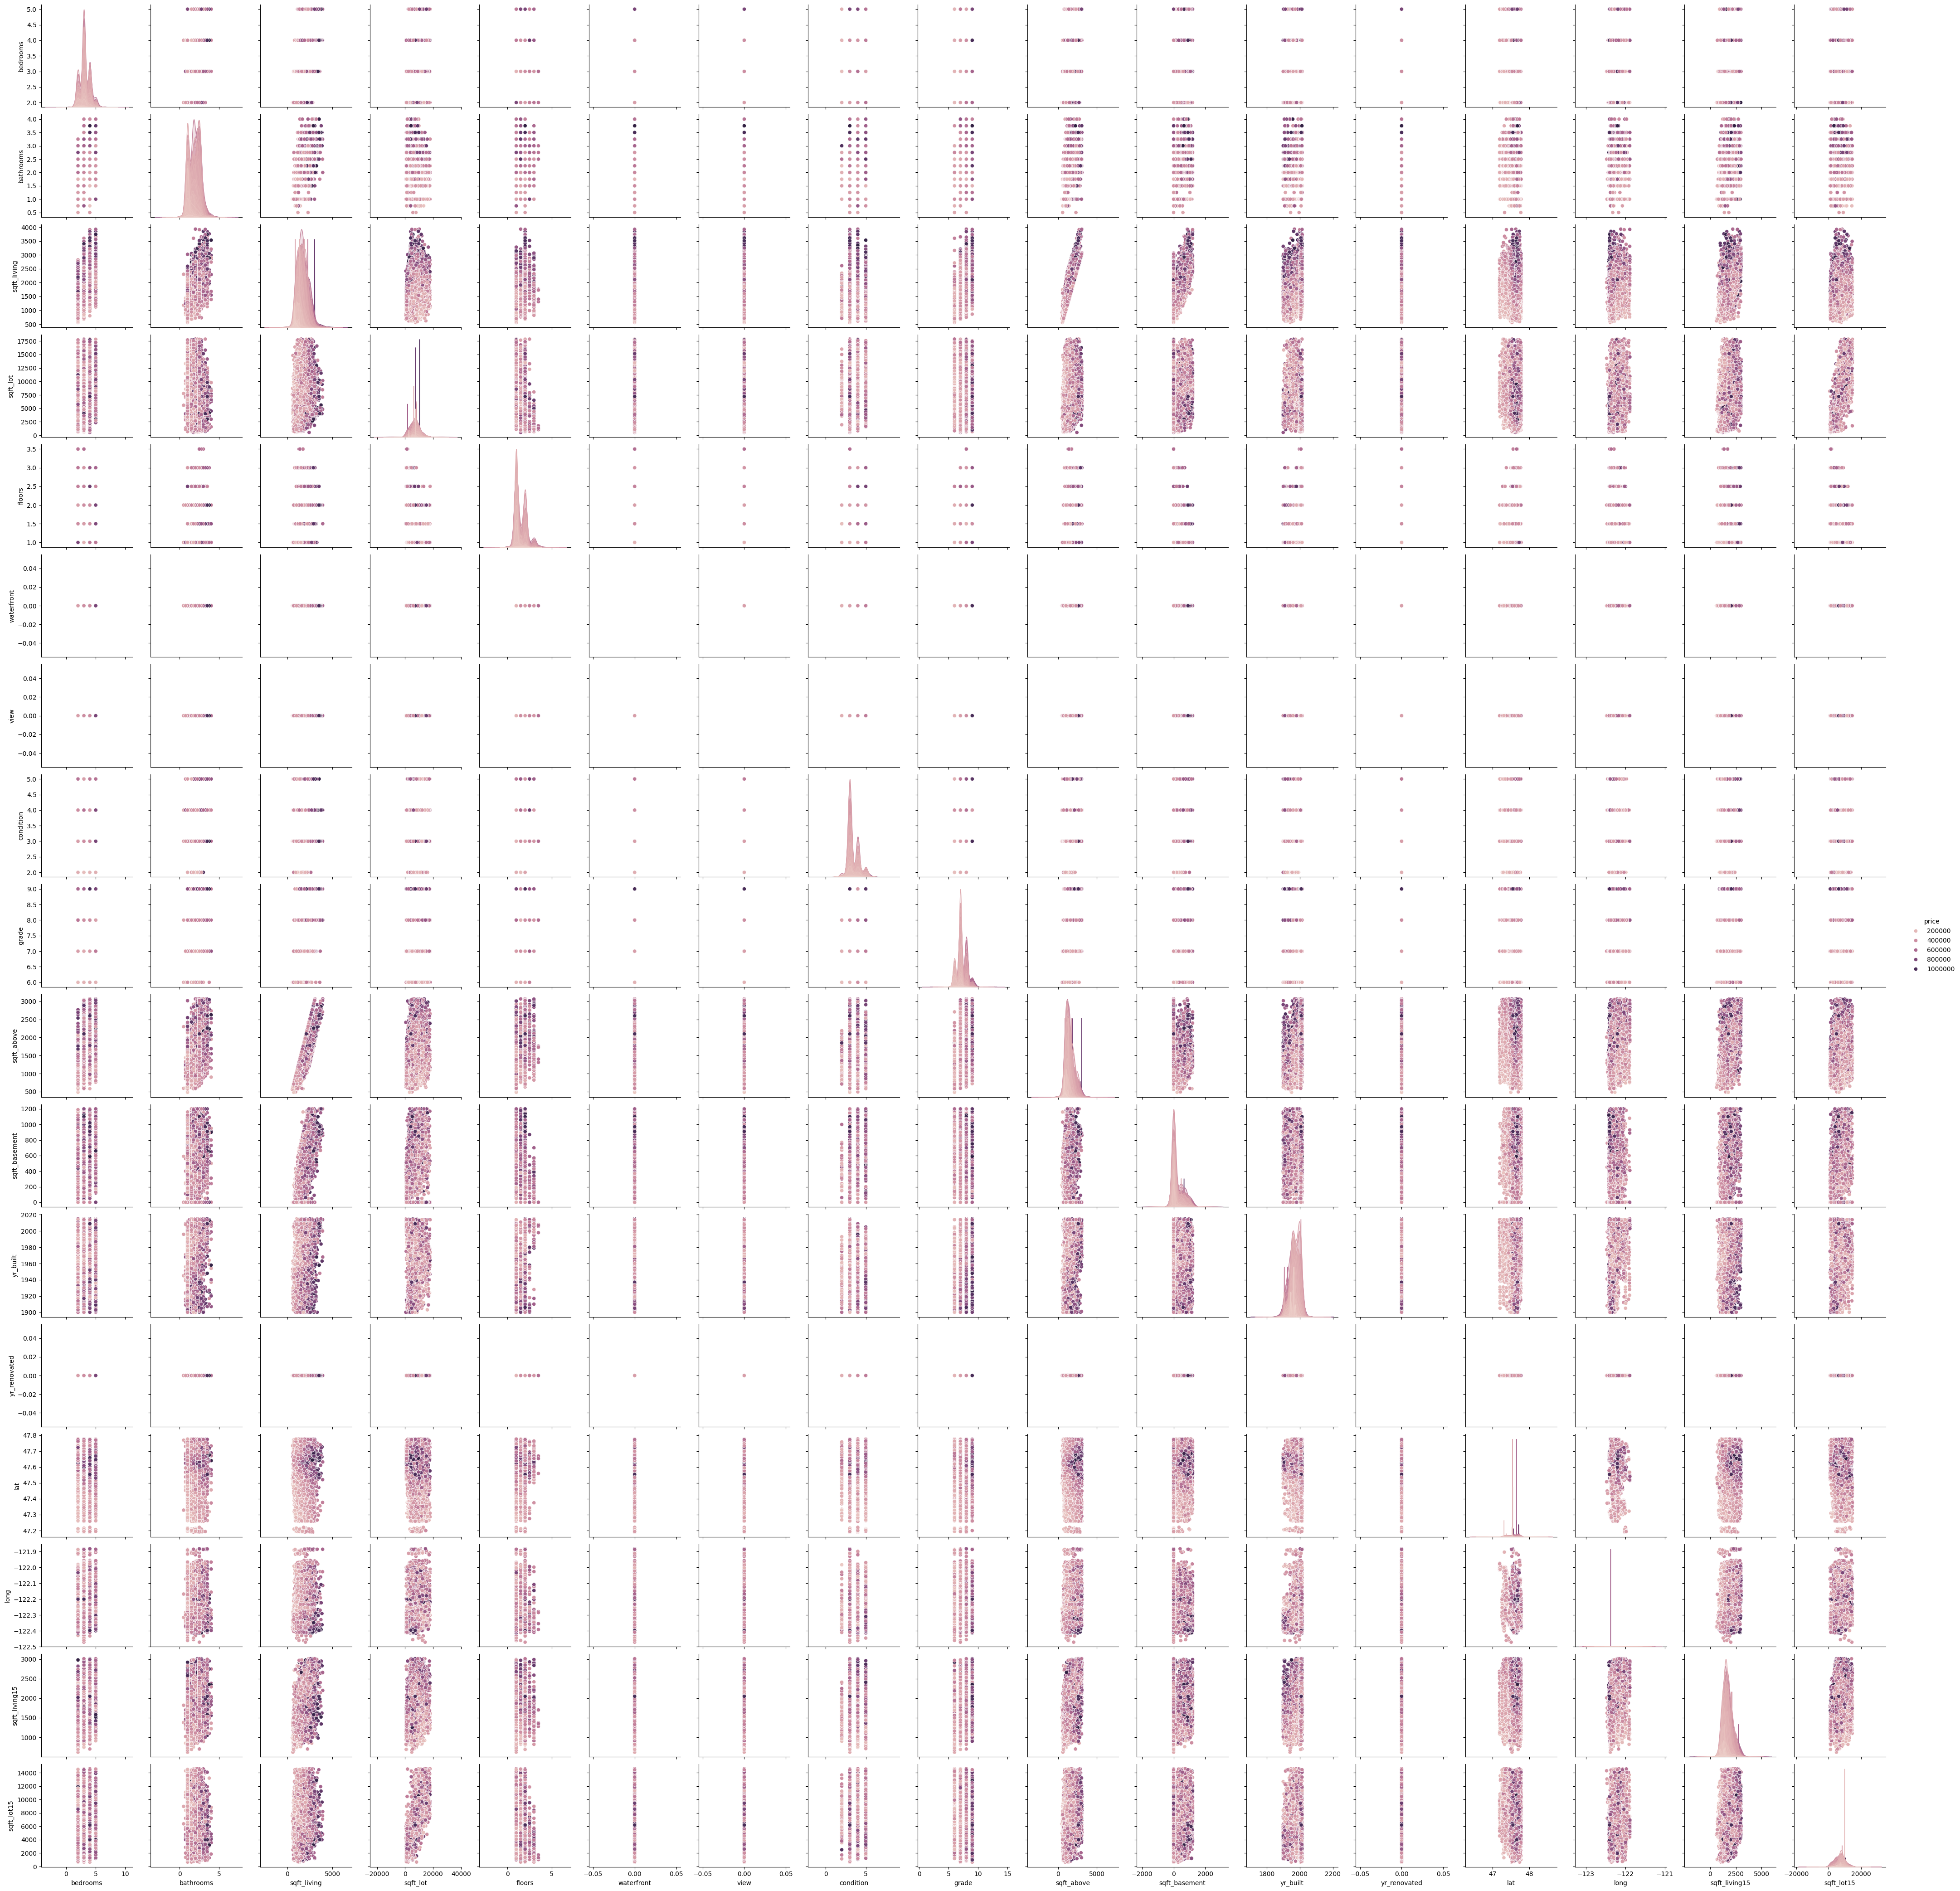

In [106]:
sns.pairplot(df, hue='price')
plt.show()

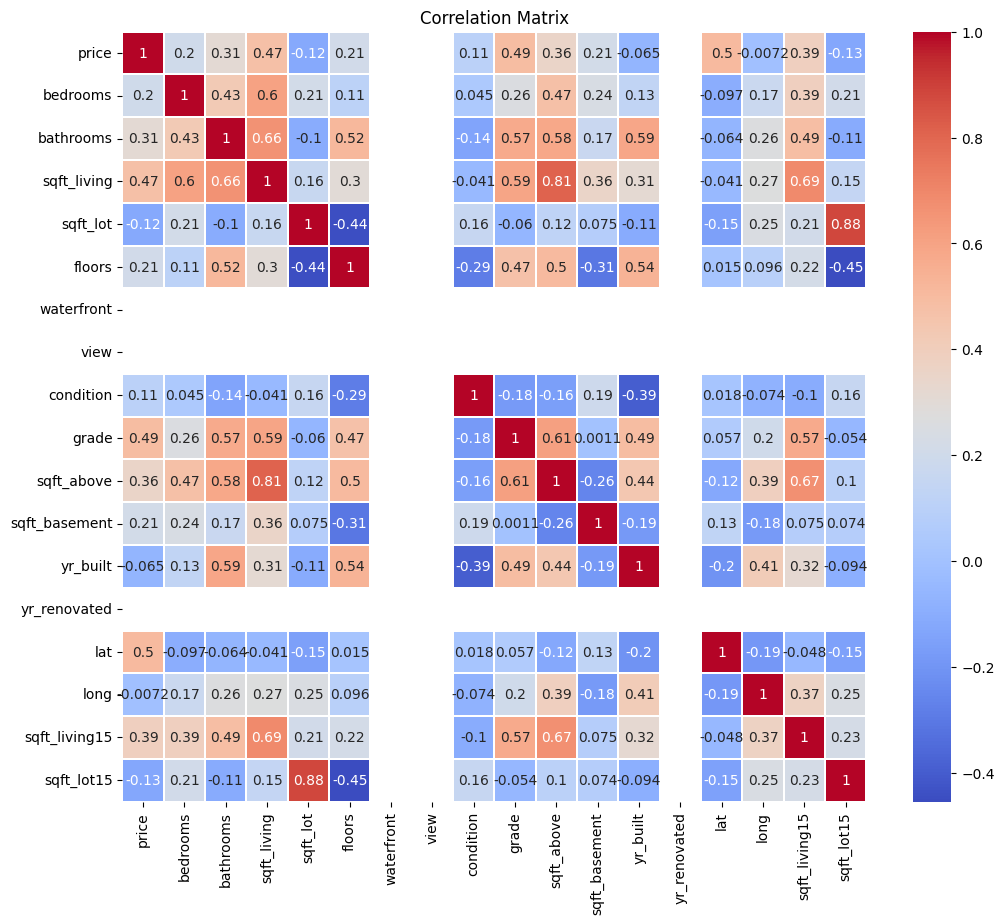

In [107]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Feature Scaling

In [108]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   
6  257500.0         3       2.25         1715      6819     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   
6     0          3      7        1715              0      1995             0   

       lat     long  sqft_living15  sqft_lot15  
0  47.5112 -122.257           1340        5650  
2  47.7379 -122.233           2720        8062  
3  47.5208 -122.393           1360        5000  
4  47.6168 -122.045           1800        7503  
6  47.3097 -122.327           2238        6819

In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [111]:
df[df.select_dtypes(include=['number']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['number']).columns])

In [113]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront  \
0 -1.183084 -0.292523  -1.458022    -1.023048 -0.361657 -0.832521         0.0   
2 -1.423023 -1.608357  -1.458022    -1.765120  1.003246 -0.832521         0.0   
3  1.005008  1.023310   1.643539     0.388699 -0.565608 -0.832521         0.0   
4  0.466718 -0.292523   0.092758    -0.118082  0.400806 -0.832521         0.0   
6 -0.979221 -0.292523   0.480454    -0.054734  0.005141  0.983793         0.0   

   view  condition     grade  sqft_above  sqft_basement  yr_built  \
0   0.0  -0.657616 -0.424697   -0.643416      -0.660273 -0.527700   
2   0.0  -0.657616 -1.711220   -1.410616      -0.660273 -1.278323   
3   0.0   2.401699 -0.424697   -0.886675       2.053672 -0.186507   
4   0.0  -0.657616  0.861825    0.292195      -0.660273  0.564117   
6   0.0  -0.657616 -0.424697    0.357688      -0.660273  0.837071   

   yr_renovated       lat      long  sqft_living15  sqft_lot15  
0           0.0 -0.335742 -0.153627      -0.887370   -0.371415  
2           0.0  1.247471  0.052461       2.163179    0.481011  
3           0.0 -0.268698 -1.321456      -0.843159   -0.601131  
4           0.0  0.401740  1.666813       0.129479    0.283455  
6           0.0 -1.742965 -0.754716       1.097697    0.041722

# 5. Train-Test Split

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x = df.drop('price', axis=1)
y = df[['price']]

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=42)

# 6. Linear Regression Model

## 6.1 Linear Regression

In [118]:
lr = LinearRegression()

In [119]:
lr.fit(x_train, y_train)

LinearRegression()

In [120]:
y_pred_lr = lr.predict(x_test)

In [122]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [123]:
print(f'MSE: {mse_lr:.2f}%')
print(f'MAE: {mae_lr:.2f}%')
print(f'R² Score: {r2_lr:.2f}%')

MSE: 0.35%
MAE: 0.44%
R² Score: 0.66%


Text(0.5, 1.0, 'Linear Regression Model')

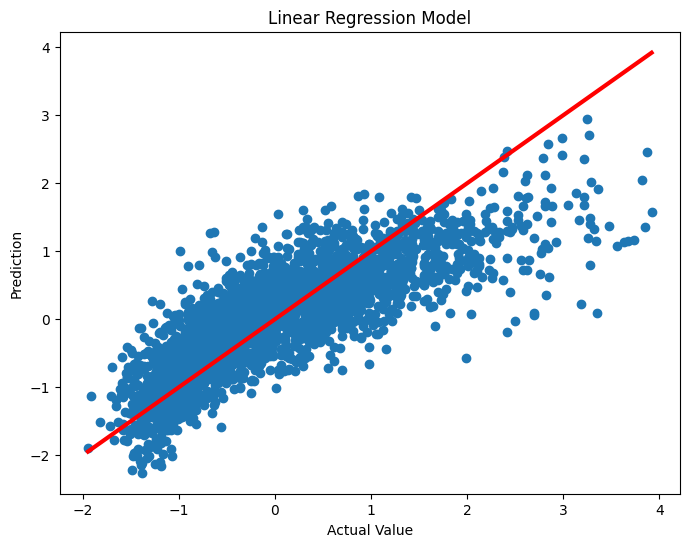

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Linear Regression Model')

## 6.2 Decision Tree

In [125]:
dt = DecisionTreeRegressor()

In [126]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [127]:
y_pred_dt = dt.predict(x_test)

In [129]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [130]:
print(f'MSE: {mse_dt:.2f}%')
print(f'MAE: {mae_dt:.2f}%')
print(f'R² Score: {r2_dt:.2f}%')

MSE: 0.29%
MAE: 0.37%
R² Score: 0.71%


Text(0.5, 1.0, 'Decision Tree Model')

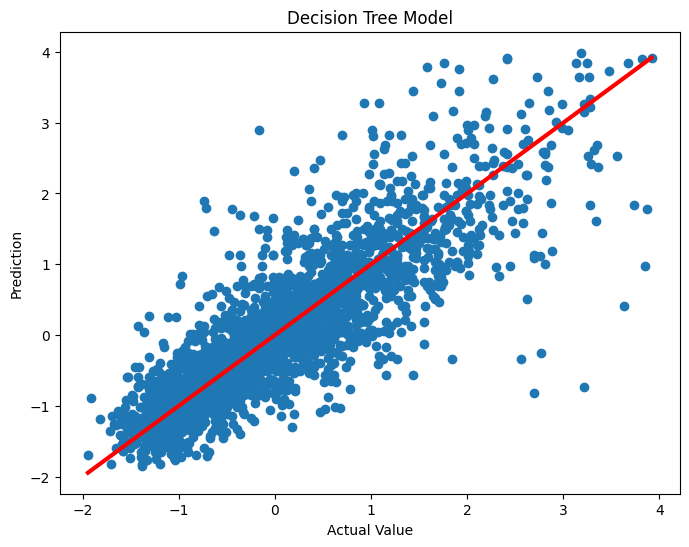

In [131]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_dt)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Decision Tree Model')

## 6.3 Random Forest

In [132]:
rf = RandomForestRegressor()

In [133]:
rf.fit(x_train, y_train)

c:\Users\alaa0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [134]:
y_pred_rf = rf.predict(x_test)

In [135]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [136]:
print(f'MSE: {mse_rf:.2f}%')
print(f'MAE: {mae_rf:.2f}%')
print(f'R² Score: {r2_rf:.2f}%')

MSE: 0.14%
MAE: 0.26%
R² Score: 0.86%


In [137]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Random Forest Model')

Text(0.5, 1.0, 'Random Forest Model')

## 6.4 Support Vector Regression

In [138]:
svr = SVR()

In [139]:
svr.fit(x_train, y_train)

c:\Users\alaa0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [140]:
y_pred_svr = svr.predict(x_test)

In [141]:
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [142]:
print(f'MSE: {mse_svr:.2f}%')
print(f'MAE: {mae_svr:.2f}%')
print(f'R² Score: {r2_svr:.2f}%')

MSE: 0.21%
MAE: 0.31%
R² Score: 0.79%


Text(0.5, 1.0, 'Support Vector Regression Model')

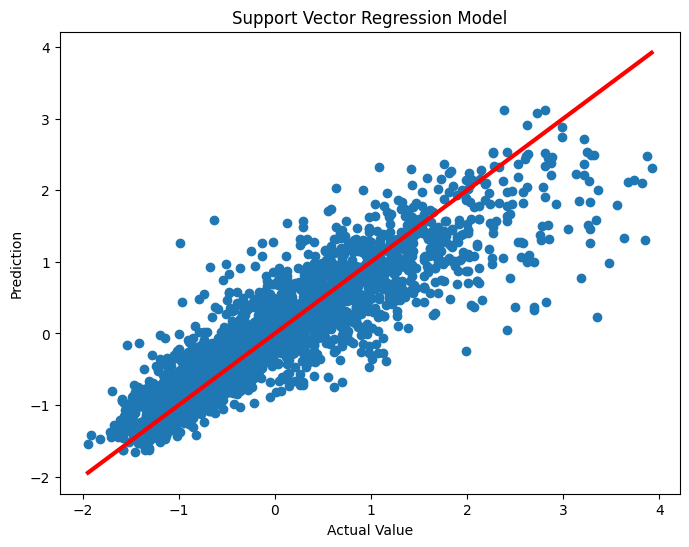

In [143]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_svr)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel('Actual Value')
plt.ylabel('Prediction')
plt.title('Support Vector Regression Model')

In [144]:
r2_scores = [
  ('Linear Regression', r2_lr),
  ('Decision Tree', r2_dt),
  ('Random Forest', r2_rf),
  ('Support Vector Machine', r2_svr)
]

scores = pd.DataFrame(r2_scores, columns=['Model', 'R2 Score'])
scores = scores.sort_values(by='R2 Score', ascending=False)

In [145]:
scores

Model  R2 Score
2           Random Forest  0.862969
3  Support Vector Machine  0.793586
1           Decision Tree  0.707160
0       Linear Regression  0.655286

C:\Users\alaa0\AppData\Local\Temp\ipykernel_19208\4210819416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R2 Score', data=scores, palette='viridis')


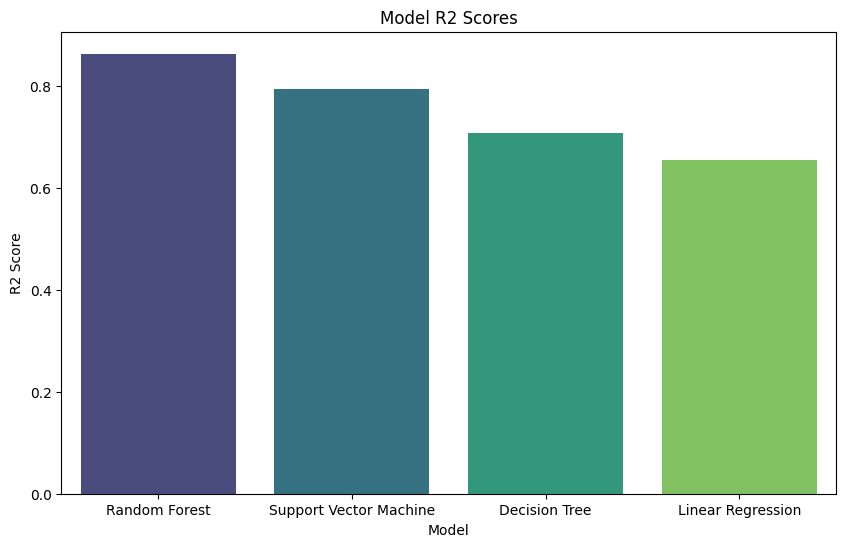

In [150]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=scores, palette='viridis')
plt.title('Model R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

# 7. Conclusion

In [151]:
print("Summary of findings:")
print(f'The Model that get the best result is the random forest with accuracy: {r2_rf:.2f}%')

Summary of findings:
The Model that get the best result is the random forest with accuracy: 0.86%
